In [88]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_excel('OrderSample_Full.xlsx')
print(df.columns)

Index(['order_number', 'type', 'uom', 'work_type', 'WorkTypeDescription',
       'item_number', 'description', 'short_location_id', 'planned_quantity',
       'picked_quantity', 'EachQuantityShipped', 'staging_location', 'wave_id',
       'pick_area', 'wh_id', 'create_date', 'pick_location', 'priority',
       'ShippedTogether', 'picked_user', 'picked_date', 'container_type',
       'PickedTogether'],
      dtype='object')


In [89]:
df.head()

,order_number,type,uom,work_type,WorkTypeDescription,item_number,description,short_location_id,planned_quantity,picked_quantity,...,pick_area,wh_id,create_date,pick_location,priority,ShippedTogether,picked_user,picked_date,container_type,PickedTogether
0,69527325.01,PP,CS,42,Multiples Pick,FRI36294,Bulk Locations Even,0202A1,24,24,...,CART,RE,2021-10-25 11:31:06.410000000,0202A1,10,69527325.01-0,RETEMP05,2021-10-25 12:02:17.423000000,Banding,Ch3704126
1,69527325.01,PP,CS,42,Multiples Pick,FRI36289,Bulk Locations Even,0206A1,24,24,...,CART,RE,2021-10-25 11:31:06.410000000,0206A1,10,69527325.01-0,RETEMP05,2021-10-25 12:06:34.863000000,Banding,Ch3704126
2,69527325.01,PP,CS,42,Multiples Pick,FRI36131,Bulk Locations Even,0216A1,32,32,...,CART,RE,2021-10-25 11:31:06.410000000,0216A1,10,69527325.01-0,RETEMP05,2021-10-25 12:14:55.673000000,Banding,Ch3704126
3,69527321.01,PP,CS,42,Multiples Pick,FRI36330,Bulk Locations Even,0210A1,24,24,...,CART,RE,2021-10-25 11:31:06.410000000,0210A1,10,69527321.01-1,RETEMP05,2021-10-25 12:11:27.910000000,Banding,Ch3704126
4,69527321.01,PP,CS,42,Multiples Pick,FRI36317,Bulk Locations Even,0204A1,24,24,...,CART,RE,2021-10-25 11:31:06.410000000,0204A1,10,69527321.01-0,RETEMP05,2021-10-25 12:23:23.033000000,Banding,Ch3704125


In [90]:
df[df.order_number == 69527260.01]

,order_number,type,uom,work_type,WorkTypeDescription,item_number,description,short_location_id,planned_quantity,picked_quantity,...,pick_area,wh_id,create_date,pick_location,priority,ShippedTogether,picked_user,picked_date,container_type,PickedTogether
23,69527260.01,PP,CS,42,Multiples Pick,FRI36330,Bulk Locations Even,0210A1,24,24,...,CART,RE,2021-10-25 11:31:06.410000000,0210A1,10,69527260.01-0,RETEMP05,2021-10-25 12:10:03.220000000,Banding,Ch3704104
24,69527260.01,PP,CS,42,Multiples Pick,FRI36294,Bulk Locations Even,0202A1,24,24,...,CART,RE,2021-10-25 11:31:06.410000000,0202A1,10,69527260.01-0,RETEMP05,2021-10-25 11:59:33.737000000,Banding,Ch3704104
25,69527260.01,PP,CS,42,Multiples Pick,FRI35821,Bulk Locations Even,0212A1,36,36,...,CART,RE,2021-10-25 11:31:06.410000000,0212A1,10,69527260.01-0,RETEMP05,2021-10-25 12:12:04.160000000,Banding,Ch3704104


In [91]:
basket = (df.groupby(['order_number', 'item_number'])['picked_quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('order_number'))
basket.head(10)

item_number,FRI35821,FRI36111,FRI36131,FRI36289,FRI36294,FRI36317,FRI36330,FRI53518
order_number,,,,,,,,
69527243.01,0.0,0.0,0.0,0.0,0.0,24.0,0.0,0.0
69527253.01,0.0,0.0,0.0,0.0,48.0,24.0,0.0,24.0
69527260.01,36.0,0.0,0.0,0.0,24.0,0.0,24.0,0.0
69527262.01,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0
69527270.01,0.0,24.0,0.0,24.0,24.0,0.0,0.0,0.0
69527284.01,0.0,0.0,0.0,0.0,24.0,24.0,24.0,24.0
69527290.01,0.0,0.0,32.0,0.0,24.0,0.0,24.0,0.0
69527294.01,0.0,24.0,32.0,0.0,24.0,0.0,0.0,0.0
69527305.01,0.0,0.0,0.0,0.0,24.0,0.0,24.0,0.0


In [92]:
def sum_to_boolean(x):
  if x<=0:
    return 0
  else:
    return 1
basket_final = basket.applymap(sum_to_boolean)
basket_final.head(10)

item_number,FRI35821,FRI36111,FRI36131,FRI36289,FRI36294,FRI36317,FRI36330,FRI53518
order_number,,,,,,,,
69527243.01,0,0,0,0,0,1,0,0
69527253.01,0,0,0,0,1,1,0,1
69527260.01,1,0,0,0,1,0,1,0
69527262.01,0,0,0,0,1,0,0,0
69527270.01,0,1,0,1,1,0,0,0
69527284.01,0,0,0,0,1,1,1,1
69527290.01,0,0,1,0,1,0,1,0
69527294.01,0,1,1,0,1,0,0,0
69527305.01,0,0,0,0,1,0,1,0


### MLXTEND es una librería de Python con herramientas para Data Science

In [93]:
# Descomentar esta línea si se necesita instalar la librería MLXTEND
# ! pip install mlxtend

In [94]:
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import apriori

In [95]:
frequent_itemsets = apriori(basket_final, min_support = 0.06,
  use_colnames = True)
frequent_itemsets.sort_values('support', ascending = False).head()

,support,itemsets
4,0.909091,(FRI36294)
18,0.454545,"(FRI36294, FRI36330)"
6,0.454545,(FRI36330)
5,0.363636,(FRI36317)
21,0.272727,"(FRI53518, FRI36317)"


In [96]:
# Usa la librería MLXTEND y aplica reglas de asociación
# Los resultados, ordenados por la métrica LIFT, muestran patrones de compra

a_rules = association_rules(frequent_itemsets, metric = "lift",
  min_threshold = 1)
a_rules.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
84,"(FRI36317, FRI36330)","(FRI53518, FRI36294)",0.181818,0.272727,0.181818,1.000000,3.666667,0.132231,inf
82,"(FRI53518, FRI36330)","(FRI36317, FRI36294)",0.181818,0.272727,0.181818,1.000000,3.666667,0.132231,inf
60,"(FRI36317, FRI36294)",(FRI53518),0.272727,0.272727,0.272727,1.000000,3.666667,0.198347,inf
61,(FRI53518),"(FRI36317, FRI36294)",0.272727,0.272727,0.272727,1.000000,3.666667,0.198347,inf
73,(FRI53518),"(FRI36317, FRI36330)",0.272727,0.181818,0.181818,0.666667,3.666667,0.132231,2.454545
...,...,...,...,...,...,...,...,...,...
42,(FRI36294),"(FRI36289, FRI36111)",0.909091,0.090909,0.090909,0.100000,1.100000,0.008264,1.010101
39,"(FRI36289, FRI36111)",(FRI36294),0.090909,0.909091,0.090909,1.000000,1.100000,0.008264,inf
68,(FRI36294),"(FRI53518, FRI36330)",0.909091,0.181818,0.181818,0.200000,1.100000,0.016529,1.022727
35,(FRI36294),"(FRI36131, FRI36111)",0.909091,0.090909,0.090909,0.100000,1.100000,0.008264,1.010101


In [97]:
# Tomamos los dos antecedentes con mayor métrica LIFT y vemos cantidad

print( (basket_final['FRI36317'] & basket_final['FRI36330']).sum())
print( (basket_fr_final['FRI53518'] & basket_final['FRI36330']).sum())

2
2


<AxesSubplot:xlabel='support', ylabel='confidence'>

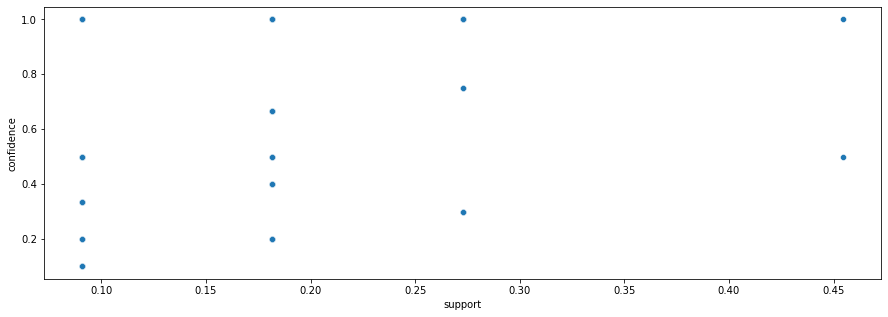

In [100]:
# Plot leverage against confidence.
plt.figure(figsize=(15,5))
sns.scatterplot(x="support", y="confidence", data=a_rules)